In [1]:
from keras.datasets import imdb

(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words =10000)
#훈련 데이터에서 가장 자주 나타나는 단어 10000개만 사용

Using TensorFlow backend.


In [2]:
print(train_data[0]) #train_data[0]문장 중 각 단어들의 해당되는 번호를 나열( 총 10000개의 feature)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
print(train_labels[0]) #긍정

1


In [4]:
word_index = imdb.get_word_index() #단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()]) #정수 인덱스와 단어를 매핑하도록 뒤집음
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])#리뷰를 디코딩함 0,1,2는 '패딩','문서시작','사전에없음'을 위한 인덱스로 3을 뺌
#https://blog.naver.com/shwotjd14/221531924188
#https://blog.naver.com/yisu0407/221508385142


In [5]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
#신경망에는 리스트를 입력 값으로 둘 수 없음 -> 리스트를 텐서로 바꾸는 작업을 해야함
#패딩하는 방식과 원-핫 인코딩 방식이 있음

#원-핫 인코딩 방식
#리스트를 0과 1 벡터로 변환함 
# [3,5] => [0, 0, 1, 0, 1, 0, 0, .... ,0] (10000차원벡터)

In [8]:
import numpy as np
print(len(train_data)) #25000개의 문장

def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences): #각 문장마다 나타나는 문자번호 i번째 문장의 sequence 문자번호를 인덱스로 하여 1로 변경
        results[i,sequence]=1.
    return results

x_train = vectorize_sequences(train_data)# 25000개의 문장데이터를 10000개의 많이 등장하는 단어 필드에 매핑
print(x_train.shape)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32') #asarray 는 참조본 생성으로 원본이 바뀌면 참조본도 동시에 데이터가 변경됨
y_test = np.asarray(test_labels).astype('float32')  #array 는 복사본 생성으로 원본이 바뀌어도 바뀌지 않음
print(y_train.shape)

25000
(25000, 10000)
(25000,)


In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [16]:
x_val = x_train[:10000] #검증 데이터
partial_x_train= x_train[10000:]
y_val = y_train[:10000]
partial_y_train= y_train[10000:]


In [17]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val)) #training set 내에서 검증함

W0903 14:34:15.325883  8212 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:1040: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 389s 26ms/step - loss: 0.5263 - acc: 0.7912 - val_loss: 0.4043 - val_acc: 0.8646
Epoch 2/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.3191 - acc: 0.9018 - val_loss: 0.3117 - val_acc: 0.8861
Epoch 3/20
15000/15000 [==============================] - 4s 263us/step - loss: 0.2324 - acc: 0.9237 - val_loss: 0.2944 - val_acc: 0.8805
Epoch 4/20
15000/15000 [==============================] - 4s 281us/step - loss: 0.1839 - acc: 0.9399 - val_loss: 0.2816 - val_acc: 0.8864
Epoch 5/20
15000/15000 [==============================] - 4s 263us/step - loss: 0.1478 - acc: 0.9531 - val_loss: 0.2822 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 4s 252us/step - loss: 0.1223 - acc: 0.9621 - val_loss: 0.2894 - val_acc: 0.8862
Epoch 7/20
15000/15000 [==============================] - 4s 239us/step - loss: 0.1033 - acc: 0.9691 - val_loss: 0.3048 -

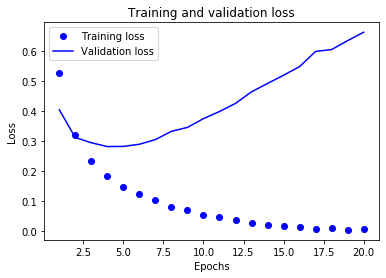

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


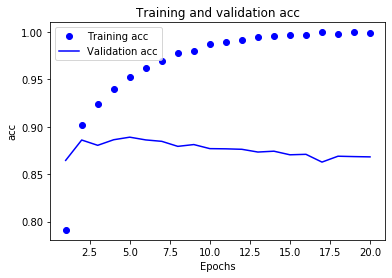

In [21]:
plt.clf() #그래프 초기화
acc = history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


In [22]:
model= models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test) #test set을 가지고 예측 정도를 봄


Epoch 1/4
25000/25000 [==============================] - 6s 259us/step - loss: 0.4727 - acc: 0.8121
Epoch 2/4
25000/25000 [==============================] - 4s 146us/step - loss: 0.2713 - acc: 0.9075
Epoch 3/4
25000/25000 [==============================] - 4s 145us/step - loss: 0.2058 - acc: 0.9268
Epoch 4/4
25000/25000 [==============================] - 12s 498us/step


In [24]:
results

[0.3058762985038757, 0.87664]

In [27]:
model.predict(x_test)

array([[0.16312188],
       [0.999825  ],
       [0.6248227 ],
       ...,
       [0.10368243],
       [0.06348917],
       [0.43510166]], dtype=float32)